In [25]:
from __future__ import annotations
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../src/")

from utils import *

import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import plotly.graph_objects as go
import datetime
import plotly.express as px


pd.set_option('display.max_columns', None)

In [ ]:
df_more_data_for_viz = pd.read_csv("../data/dataset_velo_acc_preprocess.csv")
#df_viz_2 = merge_post_format(df_more_data_for_viz)
df_viz_2 = merge_post_format(df_more_data_for_viz)
df_viz_2 = df_viz_2[["catv", "grav", "lat", 'long', 'com']]

In [26]:
df_viz_2 = pd.read_csv("../data/dataset_viz.csv")

In [ ]:
def filter_top_nine_citys_only(df_acc_):
    top_nine_citys = [75,44,33,59,31,13,69,34,67]

    mask_acc = np.zeros(df_acc_.shape[0]).astype(bool)

    for code in top_nine_citys:
        mask_acc = np.logical_or(mask_acc, df_acc_['com'] == code)

    df_acc_ = df_acc_[mask_acc]

    return df_acc_.reset_index(drop=True)

## Graph 2 
Par catégorie de véhicule : pourcentage d’accident grave par rapport au nombre d’accident.

catv (Catégorie de véhicule)
- 1 : vélo
- 2 : 2 roue s
- 3 : voiture (VL)
- 4 : Bus
- 5 : Camion
- 6 : Train
- 7 : Autre

grav (Gravité de l'accident)
- 1 : blessée léger
- 2 : blessée grave (hospitalisation)
- 3 : mort


### SNS HIST

In [ ]:
df_viz_2 = filter_top_nine_citys_only(df_viz_2)

In [ ]:
df = df_viz_2[['catv', 'grav']].dropna()
catv_dict = {"vélo" : 1, "deux roues" : 2, "voiture": 3, "bus" : 4, "camion" : 5, "train" : 6, "autre" : 7}
grav_dict = {"léger" : 1, "grave" : 2, "mort" : 3}

grav_dict = {v : k for k, v in grav_dict.items()}
catv_dict = {v : k for k, v in catv_dict.items()}

df['catv'].replace(catv_dict, inplace=True)
df['grav'].replace(grav_dict, inplace=True)
df = df.rename({'grav' : "gravité"}, axis=1)


In [ ]:
#Ville
fig, axes = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [1, 4]})

axes[1].yaxis.tick_right()

fig1 = sns.histplot(data=df[df['catv'] == 'voiture'], x="catv", hue="gravité", multiple="stack", ax=axes[0], legend=None)
fig2 = sns.histplot(data=df[df['catv'] != 'voiture'], x="catv", hue="gravité", multiple="stack", ax=axes[1])
fig.suptitle("Avec qui les vélos ont des accidents dans les grandes métropoles ?")
fig1.set(ylabel="Nombre d'accidents", xlabel="Catégories de véhicules")
fig2.set(ylabel=None, xlabel=None)


In [ ]:
#Partout
hue_order = ['deux roues', "vélo", "bus", "camion", "autre", "train"]
sns.histplot(data=df[df['catv'] != 'voiture'], x="catv", hue="grav", multiple="stack")


In [ ]:
sns.histplot(data=df[df['catv'] == 'voiture'], x="catv", hue="grav", multiple="stack")


### autre

In [ ]:
catv_dict = {"vélo" : 1, "deux roues" : 2, "voiture": 3, "bus" : 4, "camion" : 5, "train" : 6, "autre" : 7}
grav_dict = {"léger" : 1, "grave" : 2, "mort" : 3}
catv_label_list = list(df_viz_2['catv'].value_counts().index)
df_viz_2_per_catv = [df_viz_2[df_viz_2['catv'] == i] for i in catv_label_list]

In [ ]:
#pour chaque catégore
for catv_key in catv_dict:

    #pour chaque gravité
    for grav_key in grav_dict:

        d = df_viz_2[df_viz_2['catv'] == catv_dict[catv_key]] #only one categorie of vehicules
        #only 

In [ ]:
d = df_viz_2_per_catv[catv_dict['vélo']]
d[d['grav'] == 1].shape[0]

In [ ]:
df_viz_2['catv'].value_counts() / df_viz_2.shape[0]

In [ ]:
nombre_accident_dict =  { 1 : df_viz_2_per_catv[catv_dict['vélo']]
nombre_accident_léger = 

In [ ]:
df_viz_2_per_catv[catv_dict['voiture']]['grav'].value_counts()

## Graph 3 (gravité par infrastructure)

df_more_data_for_viz['vosp'].value_counts()

1 - piste
2 - bande
3 - voie reservé

In [27]:
df_viz_2 = filter_top_nine_citys_only(df_viz_2)

In [69]:
df = df_viz_2[['ame_d', 'grav']].dropna()
#catv_dict = {"vélo" : 1, "deux roues" : 2, "voiture": 3, "bus" : 4, "camion" : 5, "train" : 6, "autre" : 7}
ame_dict = {'GOULOTTE' : 'AUTRE', 'ACCOTEMENT REVETU HORS CVCB' : 'AUTRE', 'CHAUSSEE A VOIE CENTRALE BANALISEE' : 'AUTRE', 'VELO RUE' : 'AUTRE', 'DOUBLE SENS CYCLABLE BANDE' : 'AUTRE', 'DOUBLE SENS CYCLABLE PISTE' : 'AUTRE', 
"AMENAGEMENT MIXTE PIETON VELO HORS VOIE VERTE" : "mixte",
"PISTE CYCLABLE" : "piste",
"BANDE CYCLABLE" : "bande",
"couloir bus+velo".upper() : "bus + vélo"}

grav_dict = {"léger" : 1, "grave" : 2, "mort" : 3}

grav_dict = {v : k for k, v in grav_dict.items()}
#ame_dict = {v : k for k, v in ame_dict.items()}


df['grav'].replace(grav_dict, inplace=True)
df['ame_d'] = df['ame_d'].replace(ame_dict)
df['ame_d'] = df['ame_d'].apply(lambda a : a.lower())


df = df.rename({'grav' : "gravité"}, axis=1)

order = list(df['ame_d'].value_counts().index)
dict_order = { order[i] : i for i in range(len(order))}
df["ame_d"] = df["ame_d"].replace(dict_order)
df = df.sort_values(by='ame_d')
dict_order = { i : order[i] for i in range(len(order))}
df["ame_d"] = df["ame_d"].replace(dict_order)

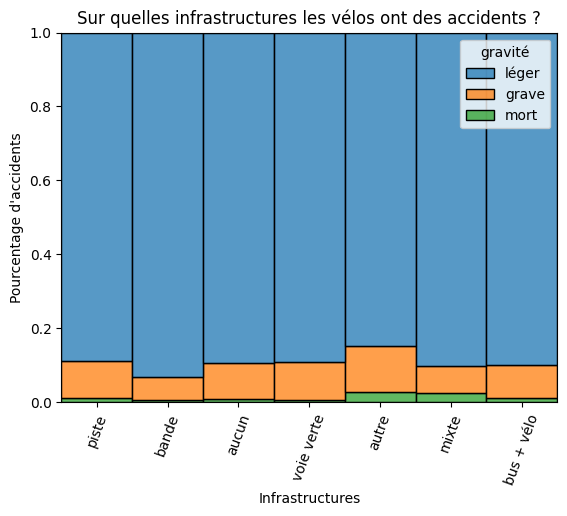

In [71]:
#Ville
fig = sns.histplot(data=df, x="ame_d", hue="gravité", multiple="fill", stat='percent')
fig.set(title = "Sur quelles infrastructures les vélos ont des accidents ?", ylabel="Pourcentage d'accidents", xlabel="Infrastructures")
plt.xticks(rotation=70);

In [39]:
df["ame_d"].value_counts() / df.shape[0]

piste               0.345847
bande               0.198968
aucun               0.190521
voie verte          0.138902
autre               0.049742
mixte               0.038480
couloir bus+velo    0.037541
Name: ame_d, dtype: float64

## Autre